# Monday, February 17th

Last time, we saw how to use `matplotlib` to create plots. As an example, let's plot $y=\sin(x)$ and $y=\cos(x)$ for $0 \leq x \leq 2\pi$.

In [1]:
import matplotlib.pyplot as plt

First, let's generate a list of $x$-values that we will use for plotting. Let's use `N=1000` data points.

In [2]:
from math import pi

x_list = []

a = 0      # Left-end of the x-interval
b = 2*pi   # Right-end of the x-interval
N = 1000   # Number of sub-intervals to divide (a,b) into

dx = (b - a)/N   # Width of each sub-interval

for i in range(N+1):
    x = a + i*dx
    x_list.append(x)

Now, we want to plug each one of these $x$-values into the $\sin$ and $\cos$ functions:

In [4]:
from math import sin, cos

sin_x_list = []
cos_x_list = []

for x in x_list:
    sin_x_list.append(sin(x))
    cos_x_list.append(cos(x))

Now plot:

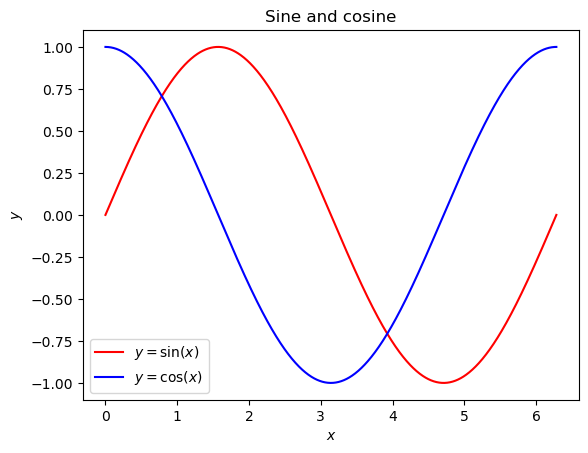

In [5]:
plt.plot(x_list, sin_x_list, 'r-', label='$y=\sin(x)$')
plt.plot(x_list, cos_x_list, 'b-', label='$y=\cos(x)$')

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.title('Sine and cosine')

plt.legend()

**Exercise:** Rewrite the cells above to use list comprehensions instead `for` loops to generate `x_list`, `sin_x_list`, `cos_x_list`.